# Square lattice system: study case

In [1]:
## FROM THE KWANT CONDA ENV.
import kwant
import numpy as np
import matplotlib.pyplot as plt

## FROM THIS DIRECTORY
import peierls_substitution as ps

## Magnetic field "by hand"

In [68]:
def make_system_square_lattice_asymmetrical(hopping_func, W=4.5, L=10, V=0, initialpoint=(1,1)):
    #************************************#
    #    Define the scattering region.   #
    #************************************#
    def rectangle(pos):
        "Notice the limits for the y-coordinate."
        x, y = pos
        return 0 <= y <= W and 0 <= x <= L
    
    lat = kwant.lattice.square()
    syst = kwant.Builder()
    syst[lat.shape(rectangle, initialpoint)] = V # on-site term
    syst[lat.neighbors()] = hopping_func # hopping term
    return syst

def make_leads_square_lattice_asymmetrical(hopping_func, W=4.5, V=0):
    def lead_shape(pos):
        y = pos[1]
        return 0 <= y <= W
    lat = kwant.lattice.square()
    # LEFT LEAD:
    symmetry_0 = kwant.TranslationalSymmetry((-1,0))
    lead_0 = kwant.Builder(symmetry_0)
    lead_0[lat.shape(lead_shape, (0,0))] = V
    lead_0[lat.neighbors()] = hopping_func
#     lead_0[lat.neighbors()] = -1
    # RIGHT LEAD:
    lead_1 = lead_0.reversed()
    return [lead_0, lead_1]


In [145]:
##******************************************##
##         "BY HAND" ASYMMETRICAL           ##
##******************************************##
def hopping_by_hand(Site1, Site2, t, B, L, peierls):
    return -t * peierls(Site1, Site2, B, L)

def peierls_syst(Site1, Site2, B, L):
    (x_i, y_i) = Site1.pos # Target
    (x_j, y_j) = Site2.pos # Source
    theta = B/2 * (x_i + x_j) * (y_i - y_j)
    return np.exp(1j*theta)

def peierls_lead_L(Site1, Site2, B, L):
    (x_i, y_i) = Site1.pos # Target
    (x_j, y_j) = Site2.pos # Source
    theta = -B/2 * 0 * (y_i - y_j)
    return np.exp(1j*theta)

def peierls_lead_R(Site1, Site2, B, L):
    (x_i, y_i) = Site1.pos # Target
    (x_j, y_j) = Site2.pos # Source
    theta = B/2 * (2*L) * (y_i - y_j)
    return np.exp(1j*theta)

In [206]:
syst_sqr = make_system_square_lattice_asymmetrical(hopping_by_hand, L=4, W=4)

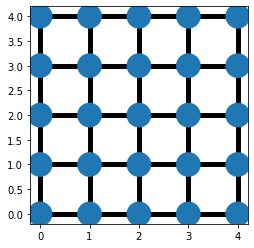

In [207]:
kwant.plot(syst_sqr);

In [208]:
syst_finalized = syst_sqr.finalized()

In [211]:
leads_sqr = make_leads_square_lattice_asymmetrical(hopping_by_hand, W=4)

lead_0_sqr_hand = leads_sqr[0].substituted(peierls='peierls_lead_L')
lead_1_sqr_hand = leads_sqr[1].substituted(peierls='peierls_lead_R')

# lead_0_sqr_hand = leads_sqr[0]
# lead_1_sqr_hand = leads_sqr[1]
leads_sqr_hand = [lead_0_sqr_hand, lead_1_sqr_hand]

In [212]:
for site in lead_0_sqr_hand.sites():
    print(site.pos)

[0.0 0.0]
[0.0 1.0]
[0.0 2.0]
[0.0 3.0]
[0.0 4.0]


In [213]:
parameters_lead_L_sqrd = dict(t = 1, 
                       B = 1, 
                       peierls_lead_L = peierls_lead_L,
                       L = 2,
                    )

parameters_lead_R_sqrd = dict(t = 1, 
                       B = 1, 
                       peierls_lead_R = peierls_lead_R,
                       L = 2,
                    )

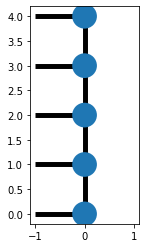

In [214]:
kwant.plot(lead_0_sqr_hand);

In [153]:
lead_0_finalized = lead_0_sqr_hand.finalized()
lead_1_finalized = lead_1_sqr_hand.finalized()

In [154]:
submatrix_lead_L_by_hand = lead_0_finalized.hamiltonian_submatrix(params=parameters_lead_L_sqrd)
submatrix_lead_R_by_hand = lead_1_finalized.hamiltonian_submatrix(params=parameters_lead_R_sqrd)

In [155]:
lead_0_finalized.cell_size

2

In [156]:
submatrix_lead_L_by_hand.shape

(4, 4)

In [157]:
print(np.real(submatrix_lead_L_by_hand))
print(np.imag(submatrix_lead_L_by_hand))

[[ 0. -1. -1.  0.]
 [-1.  0.  0. -1.]
 [-1.  0.  0.  0.]
 [ 0. -1.  0.  0.]]
[[ 0. -0. -0.  0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [158]:
print(np.real(submatrix_lead_R_by_hand))
print(np.imag(submatrix_lead_R_by_hand))

[[ 0.          0.41614684 -1.          0.        ]
 [ 0.41614684  0.          0.         -1.        ]
 [-1.          0.          0.          0.        ]
 [ 0.         -1.          0.          0.        ]]
[[ 0.          0.90929743  0.          0.        ]
 [-0.90929743  0.          0.          0.        ]
 [-0.          0.          0.          0.        ]
 [ 0.         -0.          0.          0.        ]]


In [159]:
parameters_syst_sqrd = dict(t = 1, 
                       B = 1, 
                       peierls = peierls_syst,
                       L = 2,
                    )

In [160]:
syst_submatrix_hand = syst_finalized.hamiltonian_submatrix(params=parameters_syst_sqrd)

In [161]:
print(np.real(syst_submatrix_hand))
print(np.imag(syst_submatrix_hand))

[[ 0.         -1.         -1.          0.          0.          0.        ]
 [-1.          0.          0.         -1.          0.          0.        ]
 [-1.          0.          0.         -0.54030231 -1.          0.        ]
 [ 0.         -1.         -0.54030231  0.          0.         -1.        ]
 [ 0.          0.         -1.          0.          0.          0.41614684]
 [ 0.          0.          0.         -1.          0.41614684  0.        ]]
[[ 0.         -0.         -0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.          0.          0.        ]
 [ 0.          0.          0.          0.84147098 -0.          0.        ]
 [ 0.          0.         -0.84147098  0.          0.         -0.        ]
 [ 0.          0.          0.          0.          0.          0.90929743]
 [ 0.          0.          0.          0.         -0.90929743  0.        ]]


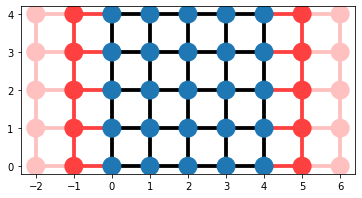

In [215]:
for lead in leads_sqr:
    syst_sqr.attach_lead(lead)
    
kwant.plot(syst_sqr);

In [223]:
parameters_sqrd = dict(t = 1, 
                       B = 1*np.pi, 
                       peierls = peierls_syst,
                       peierls_lead_L = peierls_lead_L,
                       peierls_lead_R = peierls_lead_R,
                       L = 4,
                    )

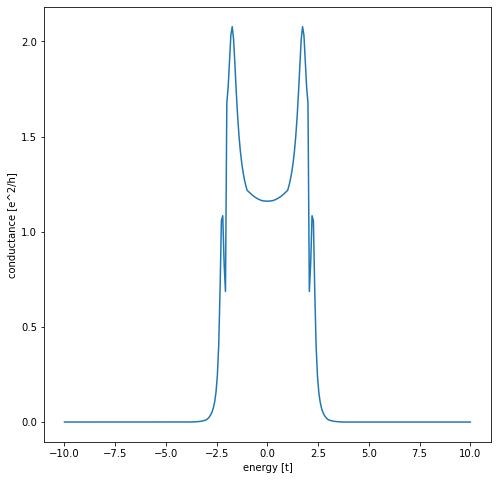

In [224]:
ps.plot_conductance(syst_sqr.finalized(), np.linspace(-10,10,301), parameters_sqrd)

## Magnetic field by `kwant.gauge`

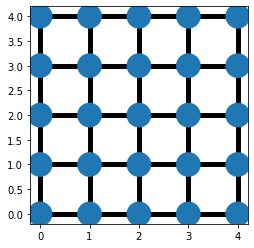

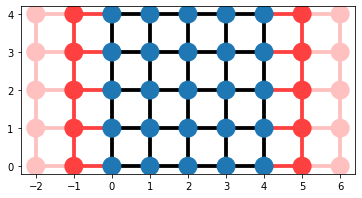

In [225]:
syst_sqr_gauge = make_system_square_lattice_asymmetrical(ps.hopping_2, L=4, W=4)
kwant.plot(syst_sqr_gauge);

lead_sqr_gauge_L, lead_sqr_gauge_R = make_leads_square_lattice_asymmetrical(ps.hopping_2, W=4)

lead_sqr_gauge_L = lead_sqr_gauge_L.substituted(peierls='peierls_lead_L')
lead_sqr_gauge_R = lead_sqr_gauge_R.substituted(peierls='peierls_lead_R')
leads_sqr_gauge = [lead_sqr_gauge_L, lead_sqr_gauge_R]

for lead in leads_sqr_gauge:
    syst_sqr_gauge.attach_lead(lead)
    
kwant.plot(syst_sqr_gauge);

## FINALIZE THE SYSTEM
syst_sqr_gauge = syst_sqr_gauge.finalized()

# ## INITIATE THE GAUGE
gauge_sqr = kwant.physics.magnetic_gauge(syst_sqr_gauge)

## DEFINE THE PEIERLS PHASES
# barrier = ps.Barreira(B = 1, Lm = 3)
# peierls_sqr_syst, peierls_sqr_lead_L, peierls_sqr_lead_R = gauge_sqr(barrier, 0, 0)
peierls_sqr_syst, peierls_sqr_lead_L, peierls_sqr_lead_R = gauge_sqr(1.0,0, 0)


## PUT THE PHASES INTO A DICTIONARY 
parameters_sqrd_gauge = dict(t = 1,
                             peierls = peierls_sqr_syst,
                             peierls_lead_L = peierls_sqr_lead_L, 
                             peierls_lead_R = peierls_sqr_lead_R)

In [226]:
syst_gauge_submatrix = syst_sqr_gauge.hamiltonian_submatrix(params=parameters_sqrd_gauge)

In [227]:
# print(syst_gauge_submatrix.real)
# print(syst_gauge_submatrix.imag)

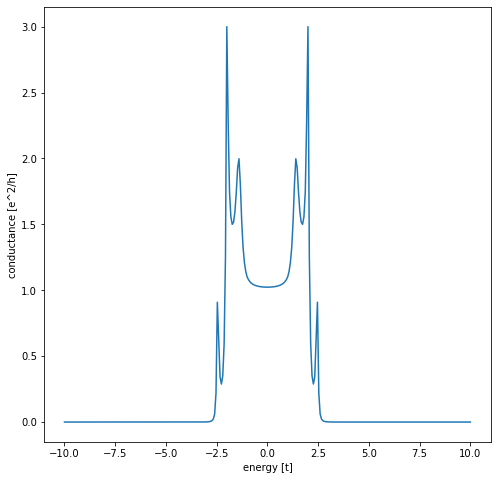

In [228]:
ps.plot_conductance(syst_sqr_gauge, np.linspace(-10,10,301), parameters_sqrd_gauge)

## Comparing

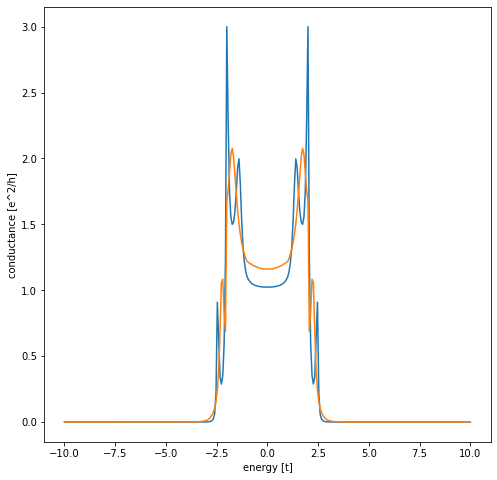

In [229]:
fig, ax = plt.subplots(figsize=(8,8))
ps.plot_conductance(syst_sqr_gauge, np.linspace(-10,10,301), parameters_sqrd_gauge, ax)
ps.plot_conductance(syst_sqr.finalized(), np.linspace(-10,10,301), parameters_sqrd, ax)

## Submatrix analysis

In [18]:
syst_sqr = ps.make_system_square_lattice(ps.hopping_by_hand, L=2, W=2.5)
submatrix_by_hand = syst_sqr.finalized().hamiltonian_submatrix(params=parameters_sqrd)